# Workplace resources and willingness to speak out:

*a study of Mental Health in Tech by the Real Ricardo*

The data used in this notebook was downloaded from [Kaggle](https://www.kaggle.com/osmi/mental-health-in-tech-survey).
The source of the data was a survey done in 2014 by [OSMI](https://osmihelp.org/), a non-profit organization dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities.


**Below is a description of the questions (columns) asked in the survey:**

| Column  | Description  |
|---|---|
| Timestamp  | Date survey was filled  |
| Gender  | Gender identity of surveyed person  |
| Country  | Country of residence  |
| State  | US residents only  |
| self_employed  | Are you self-employed?   |
| family_history  | Do you have a family history of mental illness?  |
| treatment  | Have you sought treatment for a mental health condition?  |
| work_interfere  | If you have a mental health condition, do you feel that it interferes with your work?  |
| no_employees  | How many employees does your company or organization have?  |
| remote_work  | Do you work remotely (outside of an office) at least 50% of the time?  |
| tech_company  | Is your employer primarily a tech company/organization?  |
| benefits  | Does your employer provide mental health benefits?  |
| care_options  | Do you know the options for mental health care your employer provides?  |
| wellness_program  | Has your employer ever discussed mental health as part of an employee wellness program?  |
| seek_help  | Does your employer provide resources to learn more about mental health issues and how to seek help?  |
| anonymity  | Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?  |
| leave  | How easy is it for you to take medical leave for a mental health condition?  |
| mental_health_consequence  | Do you think that discussing a mental health issue with your employer would have negative consequences?  |
| phys_health_consequence  | Do you think that discussing a physical health issue with your employer would have negative consequences?  |
| coworkers  | Would you be willing to discuss a mental health issue with your coworkers?  |
| supervisors  | Would you be willing to discuss a mental health issue with your direct supervisor(s)?  |
| mental_health_interview  | Would you bring up a mental health issue with a potential employer in an interview?  |
| mental_vs_physical  | Do you feel that your employer takes mental health as seriously as physical health?  |
| obs_consequence  | Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?  |
| comments  | Any additional notes or comments?  |

In [1]:
# classic importing of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# choosing color palette
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

## 1. Data Cleaning

In [2]:
# loading data into pandas dataframe and exploring columns and first rows
survey = pd.read_csv('survey.csv')
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
# renaming columns to have all lowercase
survey.columns = [col.lower() for col in survey.columns]

# looking at dtypes, we can see all of them are pandas objects except for age that is int.
print(survey.dtypes)

timestamp                    object
age                           int64
gender                       object
country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object


- **After exploring some of the columns I have decided not to use the *timestamp, country, state or comments columns*.**
- **I don't think there are is not enough data to do a geographical analysis.**

In [4]:
survey.drop(['timestamp', 'state', 'comments', 'country'], axis= 1, inplace= True)

In [5]:
# after finding some weird responses in the age column ('such as 99999999 and -1729')
# i decided to only include 'valid' numbers for age
survey['age'] = survey['age'].apply(lambda x: x if 0 < x < 100 else np.nan)

In [6]:
# gender is one big mess of data but I believe in myself.
# first lower case and strip eveything to decrease options
survey['gender'] = survey['gender'].apply(lambda x: x.lower().strip())

# based on the replies made these lists manually, I hope to not offend anyone.
male = ['male', 'm', 'make', 'cis male', 'man', 'cis man', 'msle', 'malr', 'mail', 'maile', 'something kinda male?', 'ostensibly male, unsure what that really means', 'male-ish', 'guy (-ish) ^_^', 'mal', 'male (cis)']
female = ['female', 'f', 'woman', 'female (cis)', 'cis-female/femme', 'femake', 'cis female', 'femail']

def regender(gender_input):
    
    """
    Input: a string about gender
    Output: male, female or other depending on our dictionary
    
    """ 
    if gender_input in male:
        return 'male'
    elif gender_input in female:
        return 'female'
    else:
        return 'other'
    
survey['gender'] = survey['gender'].apply(regender)

# check our final results
survey.gender.value_counts(dropna= False)

gender
male      994
female    247
other      18
Name: count, dtype: int64

In [33]:
# checking for nans
nan_cols = []
for col in survey.columns:
    if survey[col].isnull().sum():
        print(col + ' (%): ' + str(sum(survey[col].isnull())/len(survey)))
        nan_cols += [col]

# nans are present in the self-employed column and in the work_interfere column.
# at most there are 20% of values with nans so we'll replace with 'Don't know'
for col in nan_cols:
    survey[col].fillna("Don't know", inplace= True)

# i'm just gonna drop the rows without age.
survey = survey[survey.age != "Don't know"]

# in the context of our questions we need to drop everyone who is self-employed
print(survey['self_employed'].value_counts())
survey.loc[survey['self_employed'] == 'Yes'] = np.nan
survey.dropna(inplace=True)

self_employed
No            1092
Don't know      18
Name: count, dtype: int64


- **It seems the rest of the columns are questions that might be yes or no, with few additional options**
- **We can identify that by checking the possible answers in each question**

In [8]:
# getting unique answers for every column
exclude = ['age']
possible_answers = {col:[i for i in survey[col].unique()] for col in survey.columns if col not in exclude}
possible_answers

{'gender': ['female', 'male', 'other'],
 'self_employed': ["Don't know", 'No'],
 'family_history': ['No', 'Yes'],
 'treatment': ['Yes', 'No'],
 'work_interfere': ['Often', 'Rarely', 'Never', 'Sometimes', "Don't know"],
 'no_employees': ['6-25',
  'More than 1000',
  '26-100',
  '100-500',
  '1-5',
  '500-1000'],
 'remote_work': ['No', 'Yes'],
 'tech_company': ['Yes', 'No'],
 'benefits': ['Yes', "Don't know", 'No'],
 'care_options': ['Not sure', 'No', 'Yes'],
 'wellness_program': ['No', "Don't know", 'Yes'],
 'seek_help': ['Yes', "Don't know", 'No'],
 'anonymity': ['Yes', "Don't know", 'No'],
 'leave': ['Somewhat easy',
  "Don't know",
  'Somewhat difficult',
  'Very difficult',
  'Very easy'],
 'mental_health_consequence': ['No', 'Maybe', 'Yes'],
 'phys_health_consequence': ['No', 'Yes', 'Maybe'],
 'coworkers': ['Some of them', 'No', 'Yes'],
 'supervisor': ['Yes', 'No', 'Some of them'],
 'mental_health_interview': ['No', 'Yes', 'Maybe'],
 'phys_health_interview': ['Maybe', 'No', 'Yes']

- **After looking at these answer possibilities want to normalize all 'half-answers' to 'Don't know', so changing 'Not sure' and 'Maybes'**
- **This decision might be open for interpretation, but I made a judgement call for the sake of consistency**

In [9]:
def replace_uncertainty(survey_answer):
    """
    Uniformizes all uncertain answers.
    Input: half-answer (string)
    Output: 'Don't know'
    
    """
    
    uncertainty = ['Maybe', 'Some of them', 'Not sure']
    if survey_answer in uncertainty:
        return "Don't know"
    else:
        return survey_answer

# apply function to all columns
for col in survey.columns:
    survey[col] = survey[col].apply(replace_uncertainty)

- **The column 'care_options' asks the question: "Do you know the options for mental health care your employer provides?" and about 30% of the answers are 'Dont know'.** 
- **In my opinion: if the answer to a question 'Do you know?' is 'I don't know' - then the answer is No.**

In [10]:
survey['care_options'] = survey['care_options'].replace(to_replace="Don't know", value= 'No')
survey['care_options'].value_counts()

care_options
No     730
Yes    380
Name: count, dtype: int64

## 2. Exploratory Data Analysis

**I was trying to come up with a question to ask the data but I wasn't feeling very creative.**
**So I'm gonna do an agnostic analysis and just make a correlation matrix bewteen all the variables.**

1. The first thing I'll do is encode all the answers as numbers.
- **Important notes:**
- All the half answers go in the middle (0)

In [11]:
# create a dictionary to map out all the answers in the survey
encoding_dict = {'No': -1, "Don't know": 0, 'Yes': 1,
                 'Never': -2, 'Rarely': -1, 'Sometimes': 1, 'Often': 2,
                 'Very difficult': -2, 'Somewhat difficult': -1, 'Somewhat easy': 1, 'Very easy': 2,
                 '1-5': 0, '6-25': 1, '26-100': 2, '100-500': 3, '500-1000': 4, 'More than 1000': 5,
                 'male': -1, 'other': 0, 'female': 1}

In [12]:
# made a copy just to check values
survey_coded = survey.copy()

# for each column except the ones not excluded change the values in our dictionary
for col in survey_coded.columns:
    if col not in exclude:
        survey_coded[col] = survey_coded[col].map(encoding_dict)

In [13]:
# let's take a look at our answer-encoded dataframe.
survey_coded

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,1,0,-1,1,2,1,-1,1,1,...,1,1,-1,-1,0,1,-1,0,1,-1
1,44.0,-1,0,-1,-1,-1,5,-1,-1,0,...,0,0,0,-1,-1,-1,-1,-1,0,-1
2,32.0,-1,0,-1,-1,-1,1,-1,1,-1,...,0,-1,-1,-1,1,1,1,1,-1,-1
3,31.0,-1,0,1,1,2,2,-1,1,-1,...,-1,-1,1,1,0,-1,0,0,-1,1
4,31.0,-1,0,-1,-1,-2,3,1,1,1,...,0,0,-1,-1,0,1,1,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26.0,-1,-1,-1,1,0,2,-1,1,-1,...,0,1,-1,-1,0,0,-1,-1,0,-1
1255,32.0,-1,-1,1,1,2,2,1,1,1,...,1,-1,-1,-1,0,1,-1,-1,1,-1
1256,34.0,-1,-1,1,1,1,5,-1,1,1,...,0,-1,1,1,-1,-1,-1,-1,-1,-1
1257,46.0,1,-1,-1,-1,0,3,1,1,-1,...,0,0,1,-1,-1,-1,-1,-1,-1,-1


- **Because I'm still not feeling very creative, I'm gonna make a correlation matrix across all the variables in the study**

In [14]:
# make the correlation matrix
correlation = survey_coded.corr()

<Axes: >

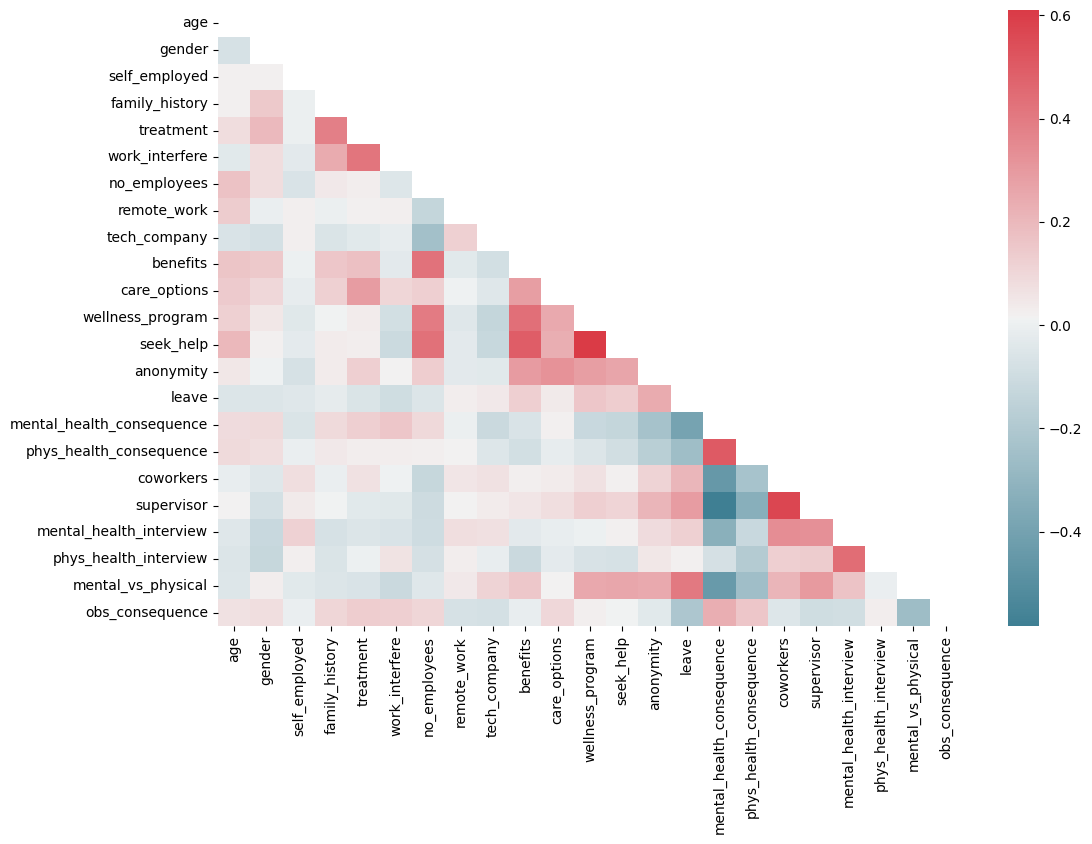

In [16]:
# making a mask to only show half the table cause its duplicated.
mask = np.triu(np.ones_like(correlation, dtype=bool))

# choosing colors
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, cmap=cmap, mask=mask, annot= False)

- **While the plot is visually appealing, I’ve come to realize that it doesn't serve my current needs effectively. The complexity introduced by the number of variables makes it challenging to discern what is important. At this stage, I lack the expertise to disentangle the various elements and extract meaningful insights from it.**

- **I’d appreciate your guidance in helping me understand how to untangle and interpret these elements effectively, as I’m still developing the necessary skills for this level of analysis.**

## 3. Hypothesis-driven analysis

**To create a score for the willingness to speak, we combined all the columns that ask 'If you're willing to speak to someone about mental health**

**Following the same logic, I combined all the columns that ask about services provided by the company**

We combined these columns by adding them together, it was important to make sure they all 'move in the same direction'
The result of this are two columns:
1. 'workplace_resources': with a possible value ranging from -6 to 6 and is the score of the company
2. 'willingness': with a possible values ranging from -3 to 3 and is the metric of the employee

In [17]:
# define columns to combine
workplace_resources = ['benefits', 
                      'wellness_program', 
                      'anonymity', 
                      'seek_help', 
                      'leave']

willingness = ['coworkers',
               'supervisor',
               'mental_health_interview']

# add columns together
survey_coded['workplace_resources'] = survey_coded.benefits + survey_coded.wellness_program + survey_coded.seek_help + survey_coded.leave + survey_coded.anonymity
survey_coded['willingness'] = survey_coded.coworkers + survey_coded.supervisor + survey_coded.mental_health_interview

In [26]:
# gonna define a function to make a nice looking histogram

def pretty_histogram(data, colname, xlabel, save=False):
    # Use histplot to plot the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data[colname], kde=True, color='blue')  # kde=True adds a density curve
    plt.title(f"Distribution of {xlabel}", fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    
    # Save the plot if needed
    if save:
        plt.savefig(f"{colname}_histogram.png")
    
    plt.show()
    

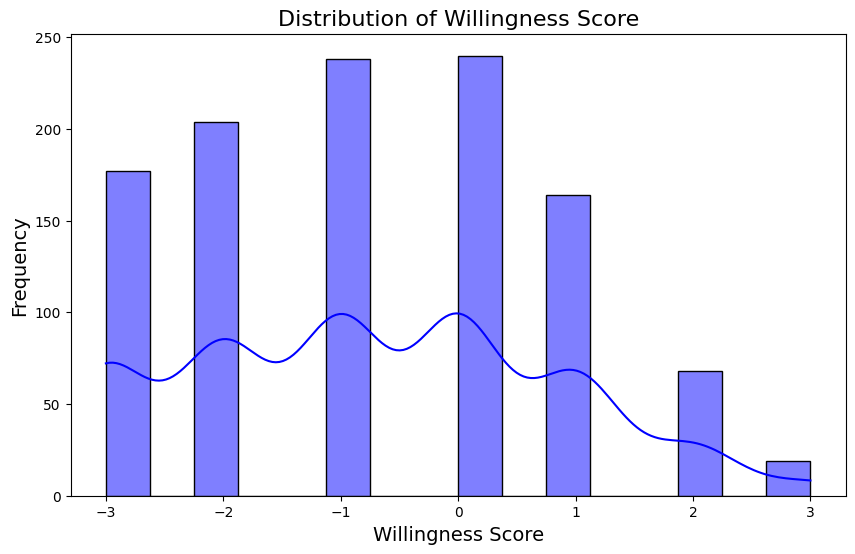

In [27]:
# make a histogram for our newly created 'Willingness' variable.
pretty_histogram(survey_coded, 'willingness', 'Willingness Score', save=False)

**This looks like a right skewed distribution, meaning that the majority of people are unwilling to talk about mental health in their work environment.**

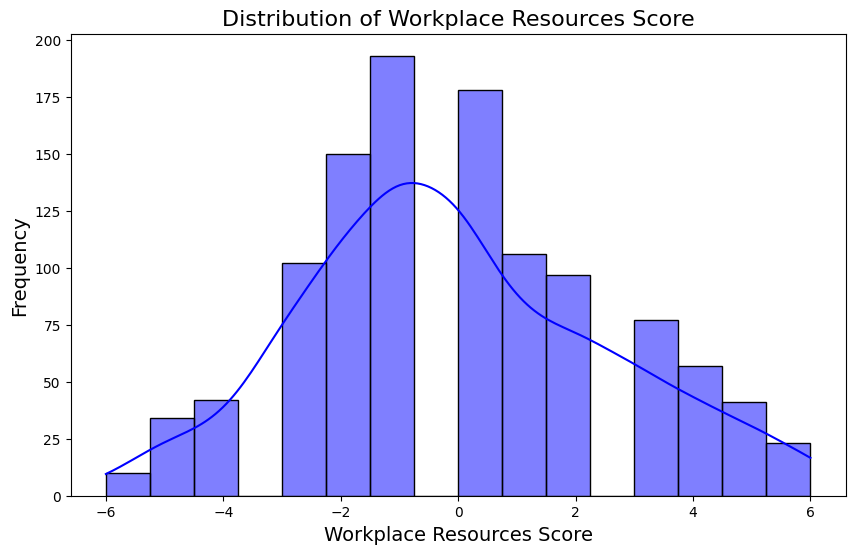

In [28]:
# make a histogram for our newly created 'Workplace Resources' variable
pretty_histogram(survey_coded, 'workplace_resources', 'Workplace Resources Score', save= True)

**This one looks more normally distributed but still centered left of the zero, meaning that the majority of companies don't have many mental health resources**

#### Before moving forwards, one of the first questions we can ask is: does having more mental health services mean that your employees are aware these services exist?

In [30]:
# interestingly to check the proportion of people aware of services I needed to recode the values in the
# care options column from 'No' = -1 to 'No' = 0
# Instead of using inplace=True, assign the result back to the column
survey_coded['care_options'] = survey_coded['care_options'].replace(to_replace=-1, value=0)

survey_coded.pivot_table(index=['workplace_resources'], values=['care_options'], aggfunc= lambda x: sum(x)/len(x))

,care_options
workplace_resources,
-6,0.400000
-5,0.441176
-4,0.333333
-3,0.215686
-2,0.180000
-1,0.176166
0,0.252809
1,0.377358
2,0.432990


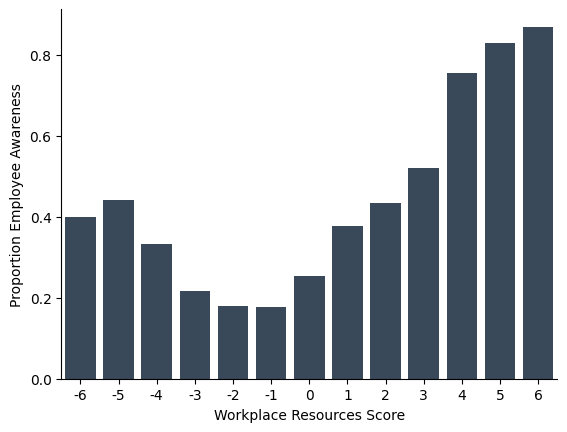

In [43]:
import os

# Ensure the output directory exists
os.makedirs('figures', exist_ok=True)

# Define the label for the x-axis
label = 'Workplace Resources Score'

# Create the bar plot without confidence intervals
bars = sns.barplot(x='workplace_resources', y='care_options', data=survey_coded, 
                   errorbar=None, color=flatui[4])  # Use errorbar=None instead of ci=None

# Set the labels for the axes
bars.set(xlabel=label, ylabel='Proportion Employee Awareness')
sns.despine()  # Remove the top and right spines

# Save the figure
figure = bars.get_figure()
figure.savefig('figures/resources_and_awareness.png', bbox_inches='tight') 

- **This is a really interesting result, kind of U-shaped.**
- **The observed results reveal a notable U-shaped pattern. This suggests that as the availability of services increases, so does the awareness among individuals. Conversely, in scenarios where no services are offered, there appears to be a heightened awareness as well. This dual trend indicates that both the presence of available resources and the absence thereof significantly influence people’s knowledge about care options.**

- **Before moving on with our analysis, I would like to see what's the behavior of our willingness score according to some other variables, such as family history, treatment and work interfere**

In [45]:
# Group by 'family_history' and calculate mean willingness
family_data = survey_coded.groupby('family_history').agg({'willingness': 'mean'}).reset_index()
family_data['label'] = ['Family History'] * len(family_data)
family_data.rename(columns={'family_history': 'Answer'}, inplace=True)

# Group by 'treatment' and calculate mean willingness
treatment_data = survey_coded.groupby('treatment').agg({'willingness': 'mean'}).reset_index()
treatment_data['label'] = ['Treatment'] * len(treatment_data)
treatment_data.rename(columns={'treatment': 'Answer'}, inplace=True)

# Concatenate the two DataFrames
willingness_variables = pd.concat([family_data, treatment_data], axis=0)

# Replace values in the 'Answer' column using a more robust method
willingness_variables['Answer'] = willingness_variables['Answer'].replace(-1, 'No')
willingness_variables['Answer'] = willingness_variables['Answer'].replace(1, 'Yes')

# Display the final DataFrame
print(willingness_variables)

  Answer  willingness           label
0     No    -0.716396  Family History
1    Yes    -0.773672  Family History
0     No    -0.723327       Treatment
1    Yes    -0.754039       Treatment


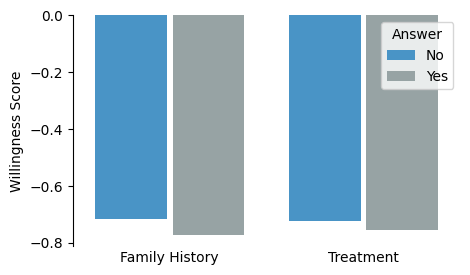

In [46]:
# making a category bar plot
fig, ax = plt.subplots(figsize=(5, 3))

bars= sns.barplot(x="label", y="willingness", hue="Answer", 
            palette= sns.color_palette(flatui[1:3]), 
            data=willingness_variables)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)


change_width(ax, .37)
sns.despine(bottom=True)
bars.set(xlabel= '', ylabel= 'Willingness Score')
bars.tick_params(axis='x', which='both', length=0)
figure = bars.get_figure()
figure.savefig('figures/history_treatment_willingness.png')

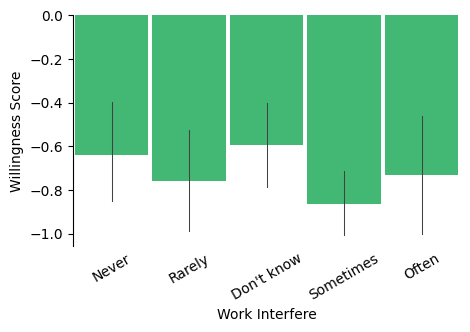

In [48]:
# Ensure the output directory exists
os.makedirs('figures', exist_ok=True)

xlabel = 'Work Interfere'
ylabel = 'Willingness Score'

# Create the figure and axis
fig, ax = plt.subplots(figsize=(5, 3))

# Create the bar plot with the correct error handling
bars = sns.barplot(x='work_interfere', y='willingness', data=survey_coded, 
                   color=flatui[-1], err_kws={'linewidth': 0.75})  # Use err_kws instead of errwidth

# Set the labels and tick labels
bars.set(xlabel=xlabel, ylabel=ylabel)
bars.set_xticks(range(len(['Never', 'Rarely', "Don't know", 'Sometimes', 'Often'])))  # Set fixed number of ticks
bars.set_xticklabels(['Never', 'Rarely', "Don't know", 'Sometimes', 'Often'], rotation=30)

# Optional: Adjust the aesthetics
sns.despine(bottom=True)
change_width(ax, 0.95)  # Assuming change_width is a defined function
bars.tick_params(axis='x', which='both', length=0)

# Save the figure
figure = bars.get_figure()
figure.savefig('figures/work_interfere_willingness.png', bbox_inches='tight')

In [49]:
# I also did this analysis for gender but I find it slightly less interesting.
gender_willingness = survey_coded.groupby('gender').agg({'willingness':'mean'})
gender_willingness

,willingness
gender,
-1,-0.659404
0,-0.615385
1,-1.053333


- **Contrary to expectations, it appears that women are less likely to discuss mental health openly. Upon reflection, this observation could be understood in the context of the tech industry, which is predominantly male. In such an environment, women may face significant challenges in advancing their careers, leading to heightened apprehension about voicing their mental health struggles. The fear of exacerbating their difficulties in an already challenging landscape might discourage them from bringing up these issues, potentially hindering their overall well-being.**

In [50]:
# to reach the answer to our main question
willingness_treatment = survey_coded.groupby('workplace_resources').agg({'willingness':'mean'})
willingness_treatment

,willingness
workplace_resources,
-6,-2.600000
-5,-1.323529
-4,-1.000000
-3,-1.333333
-2,-0.820000
-1,-0.782383
0,-0.752809
1,-0.641509
2,-0.453608


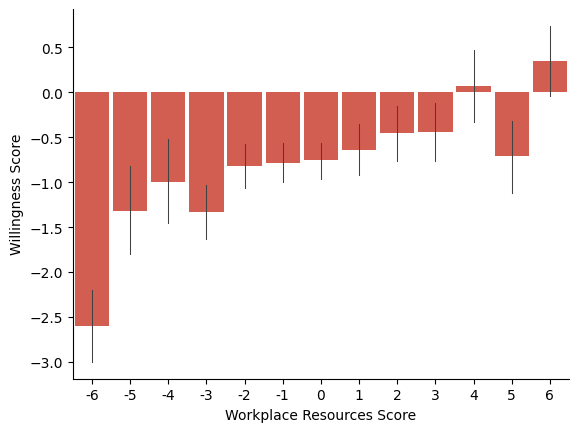

In [52]:
os.makedirs('figures', exist_ok=True)

# Create labels for the plot
xlabel = 'Workplace Resources Score'
ylabel = 'Willingness Score'

# Create the figure and axis
fig, ax = plt.subplots()

# Create the bar plot with the updated error handling
bars = sns.barplot(x='workplace_resources', y='willingness', data=survey_coded, 
                   color=flatui[3], err_kws={'linewidth': 0.75})  # Use err_kws instead of errwidth

# Set the labels
bars.set(xlabel=xlabel, ylabel=ylabel)

# Optional: Adjust the aesthetics
sns.despine()
change_width(ax, 0.9)  # Assuming change_width is a defined function

# Save the figure
figure = bars.get_figure()
figure.savefig('figures/resources_willingness.png', bbox_inches='tight') 

- **It looks like the average willingness score goes up the more resources are available in the company! which is pretty cool**
- **To get some statistical power on this we took the raw data and tried to make a linear regression to see if we could predict the willing score of a person using workplace resources.**

In [53]:
# linear regression
x = survey_coded['workplace_resources']
y = survey_coded['willingness']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The r_value is: ' + str(r_value**2))
print ('The std error is: ' + str(std_err))
print(p_value)

The slope is: 0.1253597181423453
The intercept is: -0.7280097538526822
The r_value is: 0.044725026501352155
The std error is: 0.017405120068387722
1.0900374877250113e-12


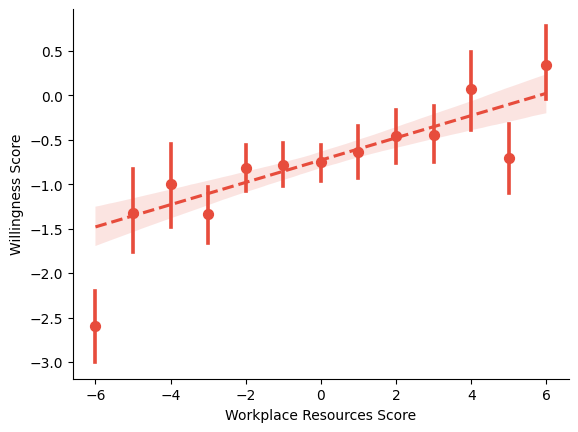

In [55]:
# Ensure the output directory exists
os.makedirs('figures', exist_ok=True)

# Define your variables (ensure x and y are defined as your DataFrame columns)
x = survey_coded['workplace_resources']  # Replace with your actual DataFrame column for x
y = survey_coded['willingness']          # Replace with your actual DataFrame column for y

# Create labels for the plot
xlabel = 'Workplace Resources Score'
ylabel = 'Willingness Score'

# Create the regression plot
reg = sns.regplot(x=x, y=y, x_estimator=np.mean,
                  scatter_kws={'color': flatui[3]}, 
                  line_kws={'color': flatui[3], 'ls': 'dashed'})

# Set the labels
reg.set(xlabel=xlabel, ylabel=ylabel)

# Optional: Adjust the aesthetics
sns.despine()

# Save the figure
figure = reg.get_figure()
figure.savefig('figures/resources_willingness_regplot.png', bbox_inches='tight')

- **There doesn't seem to be a strong relationship between these variables BUT!**
- **Even though our model only explains a small amount of the variation, when you consider all the things that might affect behavior towards mental health, even a small effect should not be ignored.**

# Conclusion

1. **Gender Disparities in Mental Health Discussions**: 
   The analysis suggests that women in the tech industry may be less likely to discuss mental health issues compared to their male counterparts. This finding highlights the potential barriers women face in a male-dominated environment, where fear of stigma or career repercussions may inhibit open communication about mental health.

2. **U-Shaped Awareness Curve**: 
   The results indicate a U-shaped relationship between workplace resources and employee awareness of available care options. This suggests that while increased resources generally correlate with higher awareness, individuals may also recognize the lack of resources, leading to a similar awareness level.

3. **Willingness Scores Correlated with Resource Availability**: 
   The willingness to seek mental health support appears to correlate with the availability of workplace resources. The bar plots demonstrate that as workplace resource scores increase, so does the average willingness score, emphasizing the importance of supportive environments.

4. **Need for Improved Workplace Support Systems**: 
   Given the findings regarding willingness to open up about mental health, there is a clear need for organizations to enhance support systems. This may involve creating a more inclusive culture that encourages open discussions about mental health without fear of negative consequences.

5. **Statistical Trends and Visual Insights**: 
   Utilizing statistical visualizations, such as bar plots and regression plots, has effectively communicated the relationships within the data. These visual tools provide insights into how workplace resources impact employee awareness and willingness, offering valuable guidance for future organizational policies and practices.

